In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import pandas as pd
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import numpy as np
from torch.optim import optimizer
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1/training_data.csv")

In [3]:
df

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,PM2.5,RH,SO2
0,16.0,2.0,0.53,0.18,-0.30,16.0,16.0,106.0,105.4,77.0,2.6
1,16.0,2.0,0.56,0.19,0.00,23.0,23.0,106.0,97.6,77.0,3.8
2,16.0,2.0,0.56,0.20,0.10,23.0,23.0,107.0,97.6,79.0,3.6
3,16.0,2.1,0.61,0.22,1.72,19.2,20.9,108.0,98.9,80.0,3.7
4,16.0,2.1,0.67,0.19,-0.40,19.0,18.0,105.0,110.6,80.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...
8779,20.0,1.9,0.30,0.09,1.30,12.0,13.0,63.0,23.5,86.0,1.7
8780,20.0,1.9,0.28,0.09,1.40,13.0,14.0,55.0,26.1,87.0,1.6
8781,20.0,2.0,0.33,0.11,1.30,14.0,16.0,50.0,28.7,89.0,1.5
8782,19.0,2.0,0.37,0.12,1.30,19.0,20.0,52.0,19.6,89.0,1.6


In [4]:
df['AMB_TEMP'].mean()

25.256894353369763

In [5]:
AMB_TEMP_mean = df['AMB_TEMP'].mean()
CH4_mean = df['CH4'].mean()
CO_mean = df['CO'].mean()
NMHC_mean = df['NMHC'].mean()
NO_mean = df['NO'].mean()
NO2_mean = df['NO2'].mean()
NOx_mean = df['NOx'].mean()
PM10_mean = df['PM10'].mean()
RH_mean = df['RH'].mean()
SO2_mean = df['SO2'].mean()
PM2_5_mean = df['PM2.5'].mean()

# std
AMB_TEMP_std = df['AMB_TEMP'].std()
CH4_std = df['CH4'].std()
CO_std = df['CO'].std()
NMHC_std = df['NMHC'].std()
NO_std = df['NO'].std()
NO2_std = df['NO2'].std()
NOx_std = df['NOx'].std()
PM10_std = df['PM10'].std()
RH_std = df['RH'].std()
SO2_std = df['SO2'].std()
PM2_5_std = df['PM2.5'].std()

In [6]:
df['AMB_TEMP'] = (df['AMB_TEMP'] -AMB_TEMP_mean)/AMB_TEMP_std
df['CH4'] = (df['CH4'] -CH4_mean)/CH4_std
df['CO'] = (df['CO'] -CO_mean)/CO_std
df['NMHC'] = (df['NMHC'] -NMHC_mean)/NMHC_std
df['NO'] = (df['NO'] -NO_mean)/NO_std
df['NO2'] = (df['NO2'] -NO2_mean)/NO2_std
df['NOx'] = (df['NOx'] -NOx_mean)/NOx_std
df['PM10'] = (df['PM10'] -PM10_mean)/PM10_std
df['RH'] = (df['RH'] -RH_mean)/RH_std
df['SO2'] = (df['SO2'] -SO2_mean)/SO2_std
df['PM2.5'] = (df['PM2.5'] -PM2_5_mean)/PM2_5_std

In [7]:
target = df['PM2.5'] 

In [8]:
target = torch.tensor(target.to_numpy().astype(np.float32))
target = target.view(target.shape[0], 1)

In [9]:
target

tensor([[ 2.5051],
        [ 2.2125],
        [ 2.2125],
        ...,
        [-0.3724],
        [-0.7138],
        [-1.0064]])

In [10]:
df=df.drop(columns=['PM2.5'])

In [11]:
df

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,-1.702548,1.158508,0.975579,0.063109,-0.736558,0.502490,0.102198,1.791526,0.078993,-0.162208
1,-1.702548,1.158508,1.148339,0.125311,-0.663289,1.447084,0.811782,1.791526,0.078993,0.685723
2,-1.702548,1.158508,1.148339,0.187513,-0.638865,1.447084,0.811782,1.825226,0.272763,0.544401
3,-1.702548,1.749826,1.436273,0.311917,-0.243209,0.934305,0.598907,1.858926,0.369648,0.615062
4,-1.702548,1.749826,1.781794,0.125311,-0.760982,0.907316,0.304936,1.757826,0.369648,0.544401
...,...,...,...,...,...,...,...,...,...,...
8779,-0.966859,0.567191,-0.348917,-0.496711,-0.345787,-0.037278,-0.201909,0.342429,0.950958,-0.798156
8780,-0.966859,0.567191,-0.464090,-0.496711,-0.321363,0.097664,-0.100540,0.072829,1.047844,-0.868817
8781,-0.966859,1.158508,-0.176156,-0.372306,-0.345787,0.232606,0.102198,-0.095671,1.241614,-0.939478
8782,-1.150782,1.158508,0.054191,-0.310104,-0.345787,0.907316,0.507675,-0.028271,1.241614,-0.868817


In [12]:
feature = torch.from_numpy(df.to_numpy().astype(np.float32))

In [13]:
feature 

tensor([[-1.7025,  1.1585,  0.9756,  ...,  1.7915,  0.0790, -0.1622],
        [-1.7025,  1.1585,  1.1483,  ...,  1.7915,  0.0790,  0.6857],
        [-1.7025,  1.1585,  1.1483,  ...,  1.8252,  0.2728,  0.5444],
        ...,
        [-0.9669,  1.1585, -0.1762,  ..., -0.0957,  1.2416, -0.9395],
        [-1.1508,  1.1585,  0.0542,  ..., -0.0283,  1.2416, -0.8688],
        [-1.1508,  1.1585,  0.2270,  ...,  0.0391,  1.3385, -0.7275]])

In [14]:
df1 = pd.read_csv("/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1/testing_data.csv")

In [15]:
df1

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,19.0,2.1,0.40,0.19,1.8,20.0,22.0,57.0,91.0,2.1
1,18.0,2.2,0.46,0.18,3.9,19.0,23.0,65.0,92.0,2.6
2,18.0,2.3,0.46,0.17,5.3,19.0,25.0,61.0,92.0,2.6
3,18.0,2.3,0.46,0.19,14.0,22.0,37.0,58.0,93.0,2.5
4,18.0,2.2,0.37,0.16,4.1,17.0,21.0,41.0,93.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8755,17.0,2.2,0.85,0.17,0.9,16.0,17.0,177.0,69.0,2.7
8756,17.0,2.2,0.82,0.17,0.9,18.0,18.0,143.0,70.0,2.3
8757,17.0,2.1,0.78,0.16,1.1,15.0,17.0,110.0,72.0,2.3
8758,16.0,2.1,0.73,0.14,1.2,17.0,18.0,96.0,73.0,2.4


In [16]:
df1['AMB_TEMP'] = (df1['AMB_TEMP'] -AMB_TEMP_mean)/AMB_TEMP_std
df1['CH4'] = (df1['CH4'] -CH4_mean)/CH4_std
df1['CO'] = (df1['CO'] -CO_mean)/CO_std
df1['NMHC'] = (df1['NMHC'] -NMHC_mean)/NMHC_std
df1['NO'] = (df1['NO'] -NO_mean)/NO_std
df1['NO2'] = (df1['NO2'] -NO2_mean)/NO2_std
df1['NOx'] = (df1['NOx'] -NOx_mean)/NOx_std
df1['PM10'] = (df1['PM10'] -PM10_mean)/PM10_std
df1['RH'] = (df1['RH'] -RH_mean)/RH_std
df1['SO2'] = (df1['SO2'] -SO2_mean)/SO2_std


In [17]:
df1

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,-1.150782,1.749826,0.226951,0.125311,-0.223671,1.042258,0.710413,0.140229,1.435384,-0.515512
1,-1.334704,2.341143,0.572472,0.063109,0.289217,0.907316,0.811782,0.409829,1.532269,-0.162208
2,-1.334704,2.932460,0.572472,0.000906,0.631142,0.907316,1.014520,0.275029,1.532269,-0.162208
3,-1.334704,2.932460,0.572472,0.125311,2.755963,1.312142,2.230950,0.173929,1.629154,-0.232869
4,-1.334704,2.341143,0.054191,-0.061296,0.338064,0.637432,0.609044,-0.398970,1.629154,-0.586173
...,...,...,...,...,...,...,...,...,...,...
8755,-1.518626,2.341143,2.818355,0.000906,-0.443480,0.502490,0.203567,4.184222,-0.696088,-0.091547
8756,-1.518626,2.341143,2.645595,0.000906,-0.443480,0.772374,0.304936,3.038424,-0.599203,-0.374191
8757,-1.518626,1.749826,2.415248,-0.061296,-0.394633,0.367548,0.203567,1.926326,-0.405433,-0.374191
8758,-1.702548,1.749826,2.127314,-0.185700,-0.370210,0.637432,0.304936,1.454527,-0.308548,-0.303530


In [18]:
testing = torch.from_numpy(df1.to_numpy().astype(np.float32))

In [19]:
testing

tensor([[-1.1508,  1.7498,  0.2270,  ...,  0.1402,  1.4354, -0.5155],
        [-1.3347,  2.3411,  0.5725,  ...,  0.4098,  1.5323, -0.1622],
        [-1.3347,  2.9325,  0.5725,  ...,  0.2750,  1.5323, -0.1622],
        ...,
        [-1.5186,  1.7498,  2.4152,  ...,  1.9263, -0.4054, -0.3742],
        [-1.7025,  1.7498,  2.1273,  ...,  1.4545, -0.3085, -0.3035],
        [-1.7025,  1.7498,  1.6666,  ...,  1.1512, -0.3085, -0.3742]])

In [41]:
n_samples, n_features = feature.shape

# 1) model
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6,output_dim):
        super(LinearRegression, self).__init__()
        
        # define layers
        self.linear1 = nn.Linear(input_dim, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2, hidden_size3)
        self.linear4 = nn.Linear(hidden_size3, hidden_size4)
        self.linear5 = nn.Linear(hidden_size4, hidden_size5)
        self.linear6 = nn.Linear(hidden_size5, hidden_size6)
        self.linear7 = nn.Linear(hidden_size6, output_dim)

    def forward(self, x):
        out = self.linear1(x)
        out = F.relu(out)

        out = self.linear2(out)
        out = F.relu(out)

        out = self.linear3(out)
        out = F.relu(out)

        out = self.linear4(out)
        out = F.relu(out)

        out = self.linear5(out)
        out = F.relu(out)

        out = self.linear6(out)
        out = F.relu(out)

        out = self.linear7(out)
        return out

In [46]:
model = LinearRegression(n_features, 64, 32, 16, 8, 4, 2, 1)
print(n_features)
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


10


In [47]:
# 3) training loop
epochs = 10000
history = []
for epoch in range(epochs):
    # forward pass and loss
    y_predicted = model(feature)
    loss = criterion(y_predicted, target)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    
    # init optimizer
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item(): .4f}')

# show in image
predicted = model(feature).detach().numpy()
plt.show()


epoch: 10, loss =  1.1751
epoch: 20, loss =  1.1062
epoch: 30, loss =  1.0634
epoch: 40, loss =  1.0372
epoch: 50, loss =  1.0214
epoch: 60, loss =  1.0120
epoch: 70, loss =  1.0065
epoch: 80, loss =  1.0033
epoch: 90, loss =  1.0013
epoch: 100, loss =  1.0002
epoch: 110, loss =  0.9995
epoch: 120, loss =  0.9991
epoch: 130, loss =  0.9988
epoch: 140, loss =  0.9986
epoch: 150, loss =  0.9985
epoch: 160, loss =  0.9983
epoch: 170, loss =  0.9982
epoch: 180, loss =  0.9980
epoch: 190, loss =  0.9978
epoch: 200, loss =  0.9975
epoch: 210, loss =  0.9972
epoch: 220, loss =  0.9969
epoch: 230, loss =  0.9964
epoch: 240, loss =  0.9959
epoch: 250, loss =  0.9954
epoch: 260, loss =  0.9949
epoch: 270, loss =  0.9945
epoch: 280, loss =  0.9941
epoch: 290, loss =  0.9937
epoch: 300, loss =  0.9934
epoch: 310, loss =  0.9930
epoch: 320, loss =  0.9927
epoch: 330, loss =  0.9923
epoch: 340, loss =  0.9920
epoch: 350, loss =  0.9916
epoch: 360, loss =  0.9912
epoch: 370, loss =  0.9908
epoch: 380

In [62]:
FILE = 'hw1_2.pt'

In [63]:

torch.save(model, FILE)


In [48]:
testing[0]

tensor([-1.1508,  1.7498,  0.2270,  0.1253, -0.2237,  1.0423,  0.7104,  0.1402,
         1.4354, -0.5155])

In [49]:
def predict_value(test_data, model):
    yb = model(test_data)
    _, preds  = torch.max(yb, dim=1)
    return preds

In [50]:
ans = []
test = testing[0]
yb = model(test)
#print('Predicted:', predict_value(test, model))

In [51]:
test1 = testing[1]
yb1 = model(test1)

In [52]:
yb1

tensor([0.1825], grad_fn=<AddBackward0>)

In [53]:
ans1 = torch.cat((yb1,yb),0)

In [54]:
ans1 

tensor([ 0.1825, -0.0492], grad_fn=<CatBackward0>)

In [55]:
test2 = testing[2]
yb2 = model(test2)

In [56]:
ans1 = torch.cat((ans1,yb2),0)

In [57]:
ans1

tensor([ 0.1825, -0.0492,  0.0193], grad_fn=<CatBackward0>)

In [58]:
testing.size()

torch.Size([8760, 10])

In [ ]:
len(testing)

8760

In [59]:
yb

tensor([-0.0492], grad_fn=<AddBackward0>)

In [60]:
yb*PM2_5_std +PM2_5_mean

tensor([37.3142], grad_fn=<AddBackward0>)

In [79]:
ans = torch.empty(len(testing))
for i in range(len(testing)):
  yb = model(testing[i])
  # print(i,yb)
  yb = yb*PM2_5_std +PM2_5_mean
  # print(i,yb)
  ans[i] = yb
  # print(ans)
  # print("-------------------")

In [80]:
ans

tensor([37.3142, 43.4891, 39.1402,  ..., 97.7477, 79.8726, 69.5898],
       grad_fn=<CopySlices>)

In [112]:
import pandas as pd
import os.path
ans_np = ans.detach().numpy() #convert to Numpy array
df = pd.DataFrame(ans_np) #convert to a dataframe


In [113]:
df 

,0
0,37.314159
1,43.489117
2,39.140217
3,36.097874
4,23.919878
...,...
8755,121.537697
8756,121.537697
8757,97.747711
8758,79.872620


In [114]:
df.rename(columns = {0:'PM2.5'}, inplace = True)
df.to_csv(os.path.join('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1','ans')) #save to file
#df.rename(columns = {:'INDEX'}, inplace = True)


In [115]:
df3 = pd.read_csv('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1/ans')

In [116]:
df3

,Unnamed: 0,PM2.5
0,0,37.314160
1,1,43.489117
2,2,39.140217
3,3,36.097874
4,4,23.919878
...,...,...
8755,8755,121.537700
8756,8756,121.537700
8757,8757,97.747710
8758,8758,79.872620


In [117]:
df3.rename(columns = {'Unnamed: 0':'INDEX'}, inplace = True)

In [122]:
df3['INDEX'] = df3['INDEX']+1

In [123]:
df3

,INDEX,PM2.5
0,1,37.314160
1,2,43.489117
2,3,39.140217
3,4,36.097874
4,5,23.919878
...,...,...
8755,8756,121.537700
8756,8757,121.537700
8757,8758,97.747710
8758,8759,79.872620


In [124]:
df3.to_csv(os.path.join('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1','ans'),index=False) #save to file

In [125]:
df4 = pd.read_csv('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1/ans')

In [126]:
df4 

,INDEX,PM2.5
0,1,37.314160
1,2,43.489117
2,3,39.140217
3,4,36.097874
4,5,23.919878
...,...,...
8755,8756,121.537700
8756,8757,121.537700
8757,8758,97.747710
8758,8759,79.872620


In [3]:
model = torch.load(FILE)

NameError: ignored

In [61]:
model.eval()

print('whole model load')
for parm in model.parameters():
    print(parm)

whole model load
Parameter containing:
tensor([[ 0.0069,  0.0042, -0.2777,  0.0856, -0.2670, -0.1239, -0.2727,  0.1087,
          0.1931,  0.1384],
        [ 0.2702,  0.1862,  0.2657, -0.0934,  0.1731, -0.2557, -0.0196,  0.0581,
          0.0790, -0.2344],
        [ 0.2413, -0.0206, -0.0637,  0.0352, -0.1710, -0.3020, -0.0296,  0.1623,
          0.3277,  0.3735],
        [-0.1250,  0.0614,  0.0198,  0.0163, -0.0667,  0.0317,  0.1986, -0.2159,
          0.1290, -0.2007],
        [ 0.2333, -0.0544,  0.1895, -0.3096,  0.2882, -0.1658,  0.2343, -0.1357,
          0.3480,  0.3333],
        [ 0.0822,  0.2597,  0.2402,  0.1165,  0.1615,  0.2424,  0.2409,  0.2396,
          0.0914,  0.0437],
        [ 0.0770, -0.0716, -0.4058, -0.1654, -0.1710, -0.1823,  0.2035,  0.1935,
         -0.1109,  0.1860],
        [ 0.0192, -0.1350,  0.2758,  0.0525, -0.2492, -0.2768, -0.2002, -0.2146,
         -0.0315, -0.2613],
        [ 0.1931, -0.2362,  0.2767,  0.1239, -0.1115, -0.2430,  0.0121, -0.3318,
        

In [65]:
len(testing)

8760

In [ ]:
for i in range(len(testing)):

TypeError: ignored

In [ ]:
class trainingDataset(Dataset):
    # This loads the data and converts it, make data rdy
    def __init__(self):
        # load data
        self.df=pd.read_csv("/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1/training_data.csv")
        # extract labels
        self.df_labels=df[['PM2.5']]

        # mean
        self.AMB_TEMP_mean = self.df['AMB_TEMP'].mean()
        self.CH4_mean = self.df['CH4'].mean()
        self.CO_mean = self.df['CO'].mean()
        self.NMHC_mean = self.df['NMHC'].mean()
        self.NO_mean = self.df['NO'].mean()
        self.NO2_mean = self.df['NO2'].mean()
        self.NOx_mean = self.df['NOx'].mean()
        self.PM10_mean = self.df['PM10'].mean()
        self.RH_mean = self.df['RH'].mean()
        self.SO2_mean = self.df['SO2'].mean()
        self.PM2_5_mean = self.df['PM2.5'].mean()


        # std
        self.AMB_TEMP_std = self.df['AMB_TEMP'].std()
        self.CH4_std = self.df['CH4'].std()
        self.CO_std = self.df['CO'].std()
        self.NMHC_std = self.df['NMHC'].std()
        self.NO_std = self.df['NO'].std()
        self.NO2_std = self.df['NO2'].std()
        self.NOx_std = self.df['NOx'].std()
        self.PM10_std = self.df['PM10'].std()
        self.RH_std = self.df['RH'].std()
        self.SO2_std = self.df['SO2'].std()
        self.PM2_5_std = self.df['PM2.5'].std()

        # drop non numeric columns to make tutorial simpler, in real life do categorical encoding
        self.df=df.drop(columns=['PM2.5'])

        # normalized

        self.df['AMB_TEMP'] = (self.df['AMB_TEMP'] -self.AMB_TEMP_mean)/self.AMB_TEMP_std
        self.df['CH4'] = (self.df['CH4'] -self.CH4_mean)/self.CH4_std
        self.df['CO'] = (self.df['CO'] -self.CO_mean)/self.CO_std
        self.df['NMHC'] = (self.df['NMHC'] -self.NMHC_mean)/self.NMHC_std
        self.df['NO'] = (self.df['NO'] -self.NO_mean)/self.NO_std
        self.df['NO2'] = (self.df['NO2'] -self.NO2_mean)/self.NO2_std
        self.df['NOx'] = (self.df['NOx'] -self.NOx_mean)/self.NOx_std
        self.df['PM10'] = (self.df['PM10'] -self.PM10_mean)/self.PM10_std
        self.df['RH'] = (self.df['RH'] -self.RH_mean)/self.RH_std
        self.df['SO2'] = (self.df['SO2'] -self.SO2_mean)/self.SO2_std
        #self.df = (self.df -self.df.mean())/self.df.std()

        # conver to torch dtypes
        self.dataset=torch.tensor(self.df.to_numpy()).float()
        self.df_labels = (self.df_labels - self.PM2_5_mean)/self.PM2_5_std
        self.labels=torch.tensor(self.df_labels.to_numpy().reshape(-1)).long()
    
    # This returns the total amount of samples in your Dataset
    def __len__(self):
        return len(self.dataset)
    
    # This returns given an index the i-th sample and label
    def __getitem__(self, idx):
        return self.dataset[idx],self.labels[idx]

In [ ]:
tr_ds=trainingDataset()
tr_ds

In [ ]:
tr_ds.PM2_5_mean

38.625344603825134

In [ ]:
tr_ds.PM2_5_std

26.654978630929566

In [ ]:
tr_ds.labels

tensor([ 2,  2,  2,  ...,  0,  0, -1])

In [ ]:
tr_ds[1]

(tensor([-1.7025,  1.1585,  1.1483,  0.1253, -0.6633,  1.4471,  0.8118,  1.7915,
          0.0790,  0.6857]), tensor(2))

In [ ]:
train_split=7320
val_split=1464
shuffle_dataset = True
random_seed = 1234
batch_size = 4


# creat data indices for training and testing splits
dataset_size = len(tr_ds)
indices = list(range(dataset_size))
# count out split size
split = int(np.floor(val_split))

if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# creating data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
# create a dataloader
train_loader = DataLoader(tr_ds, batch_size=4,sampler=train_sampler)
val_loader = DataLoader(tr_ds, batch_size=4, sampler=val_sampler)

In [ ]:
train_iter = iter(train_loader)
data = train_iter .next()
feature, label = data
print(feature, label)

tensor([[-1.3347, -0.0241,  0.3421,  0.0631, -0.6389,  1.3121,  0.7104,  0.2076,
          0.4665,  0.1911],
        [-0.9669,  2.3411,  0.6876,  0.4985,  0.4602,  2.2567,  1.9268,  0.1065,
         -0.1148,  0.4737],
        [ 0.8724, -0.6154, -0.7520, -0.6833, -0.4679, -0.7255, -0.7392, -0.6349,
          0.3696, -0.2329],
        [-0.5990,  0.5672, -0.5793, -0.6833, -0.3702, -0.3072, -0.3033,  0.0054,
          1.1447, -0.3742]]) tensor([0, 0, 0, 0])


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1/testing_data.csv")

In [ ]:
df2

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,PM10,RH,SO2
0,19.0,2.1,0.40,0.19,1.8,20.0,22.0,57.0,91.0,2.1
1,18.0,2.2,0.46,0.18,3.9,19.0,23.0,65.0,92.0,2.6
2,18.0,2.3,0.46,0.17,5.3,19.0,25.0,61.0,92.0,2.6
3,18.0,2.3,0.46,0.19,14.0,22.0,37.0,58.0,93.0,2.5
4,18.0,2.2,0.37,0.16,4.1,17.0,21.0,41.0,93.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8755,17.0,2.2,0.85,0.17,0.9,16.0,17.0,177.0,69.0,2.7
8756,17.0,2.2,0.82,0.17,0.9,18.0,18.0,143.0,70.0,2.3
8757,17.0,2.1,0.78,0.16,1.1,15.0,17.0,110.0,72.0,2.3
8758,16.0,2.1,0.73,0.14,1.2,17.0,18.0,96.0,73.0,2.4


In [ ]:
class testingDataset(Dataset):
    # This loads the data and converts it, make data rdy
    def __init__(self):
        # load data
        self.df2=pd.read_csv("/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework1/testing_data.csv")
        # extract labels
        # normalized
        self.df2['AMB_TEMP'] = (self.df2['AMB_TEMP'] - tr_ds.AMB_TEMP_mean)/tr_ds.AMB_TEMP_std
        self.df2['CH4'] = (self.df2['CH4'] -tr_ds.CH4_mean)/tr_ds.CH4_std
        self.df2['CO'] = (self.df2['CO'] -tr_ds.CO_mean)/tr_ds.CO_std
        self.df2['NMHC'] = (self.df2['NMHC'] -tr_ds.NMHC_mean)/tr_ds.NMHC_std
        self.df2['NO'] = (self.df2['NO'] -tr_ds.NO_mean)/tr_ds.NO_std
        self.df2['NO2'] = (self.df2['NO2'] -tr_ds.NO2_mean)/tr_ds.NO2_std
        self.df2['NOx'] = (self.df2['NOx'] -tr_ds.NOx_mean)/tr_ds.NOx_std
        self.df2['PM10'] = (self.df2['PM10'] -tr_ds.PM10_mean)/tr_ds.PM10_std
        self.df2['RH'] = (self.df2['RH'] -tr_ds.RH_mean)/tr_ds.RH_std
        self.df2['SO2'] = (self.df2['SO2'] -tr_ds.SO2_mean)/tr_ds.SO2_std
        # conver to torch dtypes
        self.dataset=torch.tensor(self.df2.to_numpy()).float()
    # This returns the total amount of samples in your Dataset
    def __len__(self):
        return len(self.dataset)
    
    # This returns given an index the i-th sample and label
    def __getitem__(self, idx):
        return self.dataset[idx]

In [ ]:
test_ds=testingDataset()
test_ds

In [ ]:
test_ds[0]

tensor([-1.1508,  1.7498,  0.2270,  0.1253, -0.2237,  1.0423,  0.7104,  0.1402,
         1.4354, -0.5155])

In [ ]:
#use dataloader
counter=0
for epoch in [1,2,3]:
    for batch,label in train_loader:
        if counter==0:
            print(batch,label)
            counter+=1
        print(batch.size(),label.size())

串流輸出內容已截斷至最後 5000 行。
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.S

In [ ]:
batch,label = train_loader

ValueError: ignored

In [ ]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        # define layers
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
    
        return self.linear(x)
        
    def training_step(self, batch):
        data, labels = batch 
        out = self(data)                  # Generate predictions
        loss = nn.MSELoss(out, labels) # Calculate loss
        return loss


In [ ]:
model = LinearRegression(10, 1)

In [ ]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
epochs = 100
for epoch in range(epochs):
  for batch in train_loader:
    # forward pass and loss
    loss = model.training_step(batch)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    
    # init optimizer
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item(): .4f}')

# show in image
predicted = model(feature).detach().numpy()
plt.plot(feature_numpy, target_numpy, 'ro')
plt.plot(feature_numpy, predicted, 'b')
plt.show()

RuntimeError: ignored

tensor([[-3.5513e-02],
        [ 1.0476e+00],
        [ 7.0472e-01],
        [-1.8311e-01],
        [ 9.8492e-01],
        [-3.1265e-01],
        [ 7.6737e-01],
        [ 2.1188e-01],
        [-7.8544e-01],
        [-1.0279e+00],
        [-6.3652e-01],
        [ 1.9342e-01],
        [ 1.5696e-02],
        [-3.4477e-01],
        [ 1.0338e+00],
        [ 5.2351e-01],
        [ 9.9195e-01],
        [-3.9996e-01],
        [ 6.3198e-01],
        [ 3.0797e-01],
        [ 2.4779e-01],
        [-7.0345e-02],
        [-2.4005e+00],
        [ 2.3910e+00],
        [ 5.5344e-01],
        [ 4.0545e-01],
        [ 7.0423e-01],
        [-2.0265e-01],
        [ 1.5457e+00],
        [-1.4020e+00],
        [-1.8170e+00],
        [ 3.5402e-01],
        [ 2.1184e-03],
        [ 2.0306e+00],
        [-8.1947e-02],
        [ 1.3211e+00],
        [ 3.3744e-01],
        [ 4.7144e-01],
        [-1.1527e+00],
        [-3.5635e+00],
        [-1.0092e-01],
        [ 2.8909e-01],
        [-5.8472e-01],
        [-9

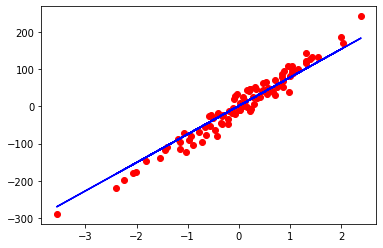

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.optim import optimizer
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
feature_numpy, target_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1234)

feature = torch.from_numpy(feature_numpy.astype(np.float32))
print(feature)
target = torch.from_numpy(target_numpy.astype(np.float32))
print(target)
target = target.view(target.shape[0], 1)
print(target)

n_samples, n_features = feature.shape
print(n_samples, n_features)
# 1) model
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        # define layers
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
    
        return self.linear(x)

model = LinearRegression(n_features, 1)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
epochs = 100
for epoch in range(epochs):
    # forward pass and loss
    y_predicted = model(feature)
    loss = criterion(y_predicted, target)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    
    # init optimizer
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item(): .4f}')

# show in image
predicted = model(feature).detach().numpy()
plt.plot(feature_numpy, target_numpy, 'ro')
plt.plot(feature_numpy, predicted, 'b')
plt.show()